## Customer Segmentation for automobile company 


### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from datetime import date

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

### DATA QUALITY ASSESSMENT AND DATA CLEANING
Running data quality checks for null values, duplicates and incorrect values 

In [31]:
transact = pd.read_excel("Raw_data.xlsx", sheet_name="Transactions")

In [33]:
transact.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [34]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [37]:
## changing data type to datetime
transact["product_first_sold_date"]=pd.to_datetime(transact["product_first_sold_date"])

In [39]:
## check for null values 
transact.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [41]:
transact.shape

(20000, 13)

##### Checking the percentage of the null values to the total data

In [44]:
transact.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

#### The percentage of null values in the online order is quite higher in comparison,so it's going to be filled with the mode 

In [47]:
oor=transact["online_order"].mode()

In [49]:
oor

0    1.0
Name: online_order, dtype: float64

In [51]:
transact["online_order"].fillna(1, inplace=True)

In [53]:
transact["online_order"].isnull().sum()

0

#### DROPPING NULL VALUES NOT UPTO 1%

In [56]:
transact.dropna(inplace=True)

In [58]:
transact.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [60]:
transact.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,19803.000000,19803.000000,19803.000000,19803,19803.000000,19803.000000,19803.000000,19803
mean,9993.979650,45.815937,1739.294955,2017-07-01 15:40:43.811543552,0.509872,1107.997866,556.046951,1970-01-01 00:00:00.000038199
min,1.000000,0.000000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1970-01-01 00:00:00.000033259
25%,4988.500000,18.000000,858.000000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1970-01-01 00:00:00.000035667
50%,9995.000000,45.000000,1738.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,1970-01-01 00:00:00.000038216
75%,15000.500000,72.000000,2615.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,1970-01-01 00:00:00.000040672
max,20000.000000,100.000000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,1970-01-01 00:00:00.000042710
std,5776.499961,30.569841,1011.946353,NaN,0.499915,582.770460,405.955660,NaN


In [62]:
transact.duplicated().sum()

0

In [64]:
transact.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

### DATA STANDARDIZATION

In [67]:
transact["order_status"].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [69]:
transact["brand"].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [71]:
transact["product_line"].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [73]:
transact["product_class"].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [75]:
transact["product_size"].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

### CALCULATED COLUMN
calculating the profit column to know the amount of profit the company is getting and the types of customers that are responsible for that

In [78]:
transact["Profit"]=transact["list_price"]-transact["standard_cost"]

In [80]:
transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,1055.82


### EXPORTING THE CLEANED DATASET

In [83]:
transact.to_csv('Cleanedtransaction.csv', index=False)

### IMPORTING THE SECOND DATASET

In [86]:
old_customer = pd.read_excel("Raw_data.xlsx", sheet_name="CustomerDemographic")

In [87]:
old_customer.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0,4 Delaware Trail,2210.0,New South Wales,Australia,9.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0,49 Londonderry Lane,2650.0,New South Wales,Australia,4.0
8,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,97736 7th Trail,2023.0,New South Wales,Australia,12.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,NaN,NaN,NaN,NaN,NaN


In [90]:
old_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [92]:
## changing the data type 
old_customer["DOB"]=pd.to_datetime(old_customer["DOB"])

In [94]:
## check for null values
old_customer.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [96]:
## percentage of null values 
old_customer.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
address                                 0.100
postcode                                0.100
state                                   0.100
country                                 0.100
property_valuation                      0.100
dtype: float64

In [98]:
## habndling null values and filling it 
old_customer["last_name"]=old_customer["last_name"].fillna("No name")
old_customer["job_industry_category"]=old_customer["job_industry_category"].fillna("No Info")
old_customer["job_title"]=old_customer["job_title"].fillna("No Info")

In [100]:
old_customer.drop(labels={"default"}, axis=1, inplace=True)

## It was observed that the same customers with missing DOB are also missing tenure 

In [103]:
old_customer[old_customer["tenure"].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN,22 Oxford Junction,2315.0,New South Wales,Australia,3.0
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN,16 Golf View Center,3020.0,VIC,Australia,6.0
266,267,Edgar,Buckler,U,53,NaT,No Info,IT,High Net Worth,N,No,NaN,48 Arizona Drive,2768.0,NSW,Australia,10.0
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN,6923 Tennessee Circle,2766.0,NSW,Australia,9.0
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN,8385 Lien Drive,3192.0,Victoria,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,No Info,IT,Affluent Customer,N,No,NaN,3052 Green Drive,3142.0,VIC,Australia,11.0
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN,344 Dayton Drive,2148.0,NSW,Australia,9.0
3930,3931,Kylie,Epine,U,19,NaT,No Info,IT,High Net Worth,N,Yes,NaN,22 Mifflin Junction,2096.0,NSW,Australia,9.0
3934,3935,Teodor,Alfonsini,U,72,NaT,No Info,IT,High Net Worth,N,Yes,NaN,3 Kedzie Center,3106.0,VIC,Australia,10.0


In [105]:
old_customer.dropna(inplace=True)

In [107]:
old_customer.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

In [109]:
old_customer.duplicated().sum()

0

In [111]:
old_customer.describe()

,customer_id,past_3_years_bike_related_purchases,DOB,tenure,postcode,property_valuation
count,3909.000000,3909.000000,3909,3909.000000,3909.000000,3909.000000
mean,2001.356869,49.032745,1977-07-13 20:39:58.158096704,10.655922,2986.934766,7.512663
min,1.000000,0.000000,1843-12-21 00:00:00,1.000000,2000.000000,1.000000
25%,1005.000000,24.000000,1968-01-26 00:00:00,6.000000,2200.000000,6.000000
50%,2002.000000,48.000000,1977-07-22 00:00:00,11.000000,2768.000000,8.000000
75%,2998.000000,73.000000,1987-02-22 00:00:00,15.000000,3750.000000,10.000000
max,4000.000000,99.000000,2002-03-11 00:00:00,22.000000,4883.000000,12.000000
std,1154.026797,28.774917,NaN,5.658533,845.816177,2.824744


## Checking for customers with no bike related purchase for the past 3 years 

In [114]:
old_customer[old_customer["past_3_years_bike_related_purchases"]== 0]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
278,279,Tamera,Hinckes,Female,0,1981-09-09,Web Designer I,Manufacturing,Mass Customer,N,No,11.0,34 Kim Center,2036.0,NSW,Australia,11.0
309,310,Myranda,Clowser,Female,0,1985-02-13,Account Coordinator,Financial Services,Mass Customer,N,Yes,18.0,06 Corry Pass,2450.0,NSW,Australia,9.0
427,428,Freida,Everil,Female,0,1977-05-03,Structural Engineer,Health,High Net Worth,N,Yes,14.0,8 Moland Pass,2065.0,NSW,Australia,10.0
459,460,Illa,No name,Female,0,1986-01-23,Electrical Engineer,Manufacturing,Affluent Customer,N,Yes,16.0,455 Hooker Lane,3337.0,Victoria,Australia,2.0
474,475,Vernor,No name,Male,0,1996-11-14,Nuclear Power Engineer,Manufacturing,Affluent Customer,N,No,1.0,781 Dorton Avenue,3012.0,Victoria,Australia,10.0
485,486,Prudi,Edon,Female,0,1955-12-30,Technical Writer,Manufacturing,Affluent Customer,N,Yes,15.0,87 Stone Corner Park,3141.0,Victoria,Australia,7.0
571,572,Clementius,Everington,Male,0,1967-05-01,Clinical Specialist,Health,High Net Worth,N,Yes,5.0,909 Browning Crossing,3013.0,Victoria,Australia,10.0
601,602,Lebbie,Bruck,Female,0,1992-03-28,Office Assistant II,No Info,High Net Worth,N,Yes,9.0,506 Iowa Center,4580.0,QLD,Australia,3.0
928,929,Kippy,Conerding,Male,0,1965-09-04,Database Administrator III,Financial Services,Mass Customer,N,Yes,13.0,10421 Cordelia Parkway,3188.0,VIC,Australia,12.0
980,981,Bud,Smittoune,Male,0,1973-02-19,No Info,Retail,Mass Customer,N,No,11.0,36 Grayhawk Plaza,2031.0,NSW,Australia,9.0


In [116]:
old_customer["customer_id"]=old_customer["customer_id"].astype("int")
old_customer["tenure"]=old_customer["tenure"].astype("int")

In [118]:
old_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3909 non-null   int32         
 1   first_name                           3909 non-null   object        
 2   last_name                            3909 non-null   object        
 3   gender                               3909 non-null   object        
 4   past_3_years_bike_related_purchases  3909 non-null   int64         
 5   DOB                                  3909 non-null   datetime64[ns]
 6   job_title                            3909 non-null   object        
 7   job_industry_category                3909 non-null   object        
 8   wealth_segment                       3909 non-null   object        
 9   deceased_indicator                   3909 non-null   object        
 10  owns_car         

In [120]:
old_customer["gender"].value_counts()

gender
Female    2035
Male      1870
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

In [122]:
old_customer["gender"]=old_customer["gender"].replace("F", "Female")
old_customer["gender"]=old_customer["gender"].replace("Femal", "Female")
old_customer["gender"]=old_customer["gender"].replace("M", "Male")
old_customer["gender"]=old_customer["gender"].replace("U", np.nan)

In [124]:
old_customer.dropna(inplace=True)

In [126]:
old_customer["gender"].value_counts()

gender
Female    2037
Male      1871
Name: count, dtype: int64

In [128]:
old_customer["job_title"].value_counts()

job_title
No Info                                 495
Tax Accountant                           43
Business Systems Development Analyst     43
Social Worker                            42
Recruiting Manager                       40
                                       ... 
Database Administrator II                 4
Health Coach III                          3
Health Coach I                            3
Research Assistant III                    3
Developer I                               1
Name: count, Length: 196, dtype: int64

In [130]:
old_customer["job_industry_category"].value_counts()

job_industry_category
Manufacturing         796
Financial Services    766
No Info               655
Health                596
Retail                358
Property              266
IT                    150
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [132]:
## standardizng the data by correcting the spelling error
old_customer["job_industry_category"]=old_customer["job_industry_category"].replace("Argiculture", "Agriculture")

In [134]:
old_customer["job_industry_category"].value_counts()

job_industry_category
Manufacturing         796
Financial Services    766
No Info               655
Health                596
Retail                358
Property              266
IT                    150
Entertainment         136
Agriculture           113
Telecommunications     72
Name: count, dtype: int64

In [136]:
old_customer["wealth_segment"].value_counts()

wealth_segment
Mass Customer        1951
High Net Worth        995
Affluent Customer     962
Name: count, dtype: int64

In [138]:
old_customer["deceased_indicator"].value_counts()

deceased_indicator
N    3906
Y       2
Name: count, dtype: int64

In [140]:
old_customer["owns_car"].value_counts()

owns_car
Yes    1971
No     1937
Name: count, dtype: int64

In [142]:
old_customer["state"].value_counts()

state
NSW                2004
VIC                 919
QLD                 821
New South Wales      85
Victoria             79
Name: count, dtype: int64

In [144]:
## replacing the values 
old_customer["state"]=old_customer["state"].replace("NSW", "New South Wales")
old_customer["state"]=old_customer["state"].replace("VIC", "Victoria")
old_customer["state"]=old_customer["state"].replace("QLD", "Queensland")

In [146]:
old_customer["state"].value_counts()

state
New South Wales    2089
Victoria            998
Queensland          821
Name: count, dtype: int64

In [148]:
old_customer["country"].value_counts()

country
Australia    3908
Name: count, dtype: int64

In [150]:
old_customer.drop(labels={"country"}, axis=1, inplace=True)

In [152]:
old_customer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation'],
      dtype='object')

In [154]:
old_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3908 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3908 non-null   int32         
 1   first_name                           3908 non-null   object        
 2   last_name                            3908 non-null   object        
 3   gender                               3908 non-null   object        
 4   past_3_years_bike_related_purchases  3908 non-null   int64         
 5   DOB                                  3908 non-null   datetime64[ns]
 6   job_title                            3908 non-null   object        
 7   job_industry_category                3908 non-null   object        
 8   wealth_segment                       3908 non-null   object        
 9   deceased_indicator                   3908 non-null   object        
 10  owns_car         

In [156]:
## creating age column
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

old_customer['Age'] = old_customer['DOB'].apply(age)

In [158]:
old_customer.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016.0,New South Wales,10.0,71
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153.0,New South Wales,10.0,43
3,4,Talbot,No name,Male,33,1961-10-03,No Info,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211.0,Queensland,9.0,63
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,No Info,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448.0,New South Wales,4.0,47
5,6,Curr,Duckhouse,Male,35,1966-09-16,No Info,Retail,High Net Worth,N,Yes,13,9 Oakridge Court,3216.0,Victoria,9.0,58
6,7,Fina,Merali,Female,6,1976-02-23,No Info,Financial Services,Affluent Customer,N,Yes,11,4 Delaware Trail,2210.0,New South Wales,9.0,48
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,No Info,Mass Customer,N,No,7,49 Londonderry Lane,2650.0,New South Wales,4.0,62
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Agriculture,Affluent Customer,N,Yes,8,97736 7th Trail,2023.0,New South Wales,12.0,51
10,11,Uriah,Bisatt,Male,99,1954-04-30,No Info,Property,Mass Customer,N,No,9,93405 Ludington Park,3044.0,Victoria,8.0,70
11,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8,44339 Golden Leaf Alley,4557.0,Queensland,4.0,30


In [160]:
old_customer["Age"].min()

22

In [162]:
old_customer["Age"].max()

93

In [164]:
## creating an age category column
def Age_category(age):
    if age >= 60:
        return "Old"
    elif age >= 40:
        return "Middle Age"
    else:
        return "Adult"


In [166]:
old_customer["age_category"]=old_customer["Age"].apply(Age_category)

In [168]:
old_customer.drop(labels={"Age"}, axis=1, inplace=True)
old_customer.drop(labels={"DOB"}, axis=1, inplace=True)

In [170]:
old_customer.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,age_category
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016.0,New South Wales,10.0,Old
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153.0,New South Wales,10.0,Middle Age
3,4,Talbot,No name,Male,33,No Info,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211.0,Queensland,9.0,Old
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,No Info,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448.0,New South Wales,4.0,Middle Age
5,6,Curr,Duckhouse,Male,35,No Info,Retail,High Net Worth,N,Yes,13,9 Oakridge Court,3216.0,Victoria,9.0,Middle Age


In [172]:
old_customer.drop(labels={"deceased_indicator"}, axis=1, inplace=True)

In [289]:
old_customer.to_csv('Customer.csv', index=False)

In [174]:
merged_cust_transact = pd.merge(old_customer, transact, left_on='customer_id', right_on='customer_id', how='inner')

In [176]:
merged_cust_transact.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 00:00:00.000038482,110.56
1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 00:00:00.000039526,751.02
2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 00:00:00.000037823,189.28
3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 00:00:00.000037873,90.10
4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000038573,17.87


In [178]:
merged_cust_transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19327 non-null  int32         
 1   first_name                           19327 non-null  object        
 2   last_name                            19327 non-null  object        
 3   gender                               19327 non-null  object        
 4   past_3_years_bike_related_purchases  19327 non-null  int64         
 5   job_title                            19327 non-null  object        
 6   job_industry_category                19327 non-null  object        
 7   wealth_segment                       19327 non-null  object        
 8   owns_car                             19327 non-null  object        
 9   tenure                               19327 non-null  int32         
 10  address   

In [180]:
merged_cust_transact.to_csv('Customertransaction.csv', index=False)

In [181]:
new_customer = pd.read_excel("Raw_data.xlsx", sheet_name="NewCustomerList")

In [184]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.88,1.1000,1.3750,1.16875,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.9500,0.80750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.44,0.4400,0.4400,0.44000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.51,0.6375,0.6375,0.63750,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.87,0.8700,1.0875,1.08750,4,4,1.703125


In [186]:
new_customer.shape

(1000, 23)

In [188]:
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [190]:
## changing the data type 
new_customer["DOB"]=pd.to_datetime(new_customer["DOB"])

In [192]:
new_customer.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20',
                          'address','country','postcode','job_title'], axis=1 , inplace=True)

In [194]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [196]:
new_customer.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
state                                   0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [198]:
new_customer["last_name"].fillna("No name",inplace=True,axis=0) 

In [200]:
new_customer["job_industry_category"].fillna("No info",inplace=True,axis=0) 

In [202]:
new_customer.dropna(inplace=True)

In [204]:
## creating age column
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_customer['Age'] = new_customer['DOB'].apply(age)

In [206]:
## creating an age category column
def Age_category(age):
    if age >= 60:
        return "Old"
    elif age >= 40:
        return "Middle Age"
    else:
        return "Adult"
        
new_customer["age_category"]=new_customer["Age"].apply(Age_category)

In [208]:
new_customer.duplicated().sum()

0

In [210]:
new_customer['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

In [212]:
new_customer['job_industry_category'].value_counts()

job_industry_category
Financial Services    202
Manufacturing         199
No info               165
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [214]:
new_customer['job_industry_category'].replace("Argiculture","Agriculture", inplace=True)

In [216]:
new_customer['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [218]:
new_customer['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [220]:
new_customer["state"]=new_customer["state"].replace("NSW", "New South Wales")
new_customer["state"]=new_customer["state"].replace("VIC", "Victoria")
new_customer["state"]=new_customer["state"].replace("QLD", "Queensland")

In [222]:
new_customer.to_csv('new_customer.csv', index=False)

## Feature Engineering 
Dropping columns that are irrelevant for the Kclustering 


In [225]:
df=merged_cust_transact.copy()

In [227]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 00:00:00.000038482,110.56
1,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 00:00:00.000039526,751.02
2,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 00:00:00.000037823,189.28
3,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 00:00:00.000037873,90.10
4,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000038573,17.87


In [229]:

df.drop(labels={"product_first_sold_date"}, axis=1, inplace=True)
df.drop(labels={"product_size"}, axis=1, inplace=True)
df.drop(labels={"product_class"}, axis=1, inplace=True)
df.drop(labels={"product_line"}, axis=1, inplace=True)
df.drop(labels={"list_price"}, axis=1, inplace=True)
df.drop(labels={"standard_cost"}, axis=1, inplace=True)
df.drop(labels={"product_id"}, axis=1, inplace=True)
df.drop(labels={"address"}, axis=1, inplace=True)
df.drop(labels={"postcode"}, axis=1, inplace=True)



In [231]:
df.drop(labels={"transaction_id"}, axis=1, inplace=True)
df.drop(labels={"first_name"}, axis=1, inplace=True)
df.drop(labels={"last_name"}, axis=1, inplace=True)
df.drop(labels={"job_title"}, axis=1, inplace=True)
df.drop(labels={"order_status"}, axis=1, inplace=True)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19327 non-null  int32         
 1   gender                               19327 non-null  object        
 2   past_3_years_bike_related_purchases  19327 non-null  int64         
 3   job_industry_category                19327 non-null  object        
 4   wealth_segment                       19327 non-null  object        
 5   owns_car                             19327 non-null  object        
 6   tenure                               19327 non-null  int32         
 7   state                                19327 non-null  object        
 8   property_valuation                   19327 non-null  float64       
 9   age_category                         19327 non-null  object        
 10  transactio

In [235]:
df.groupby("customer_id")["Profit"].sum().reset_index()

,customer_id,Profit
0,1,3018.09
1,2,2226.26
2,4,220.57
3,5,2394.94
4,6,3946.55
...,...,...
3407,3496,2045.84
3408,3497,1648.32
3409,3498,3147.33
3410,3499,4955.25


In [237]:

agg_customer=df.groupby(by="customer_id", as_index=False).agg(
    Monetary_value= ("Profit", "sum"),
    Frequency= ("transaction_date", "nunique"),
    Last_Invoice=("transaction_date","max")
)


In [239]:
agg_customer.head(10)

,customer_id,Monetary_value,Frequency,Last_Invoice
0,1,3018.09,11,2017-12-23
1,2,2226.26,3,2017-08-24
2,4,220.57,2,2017-06-18
3,5,2394.94,6,2017-12-14
4,6,3946.55,5,2017-10-27
5,7,220.11,3,2017-04-21
6,8,7066.94,10,2017-12-08
7,9,2353.11,6,2017-10-13
8,11,3638.84,6,2017-11-14
9,12,3540.03,6,2017-10-24


In [241]:
agg_customer["Recency"]= (agg_customer["Last_Invoice"].max()-agg_customer["Last_Invoice"]).dt.days

In [243]:
agg_customer.head()

,customer_id,Monetary_value,Frequency,Last_Invoice,Recency
0,1,3018.09,11,2017-12-23,7
1,2,2226.26,3,2017-08-24,128
2,4,220.57,2,2017-06-18,195
3,5,2394.94,6,2017-12-14,16
4,6,3946.55,5,2017-10-27,64


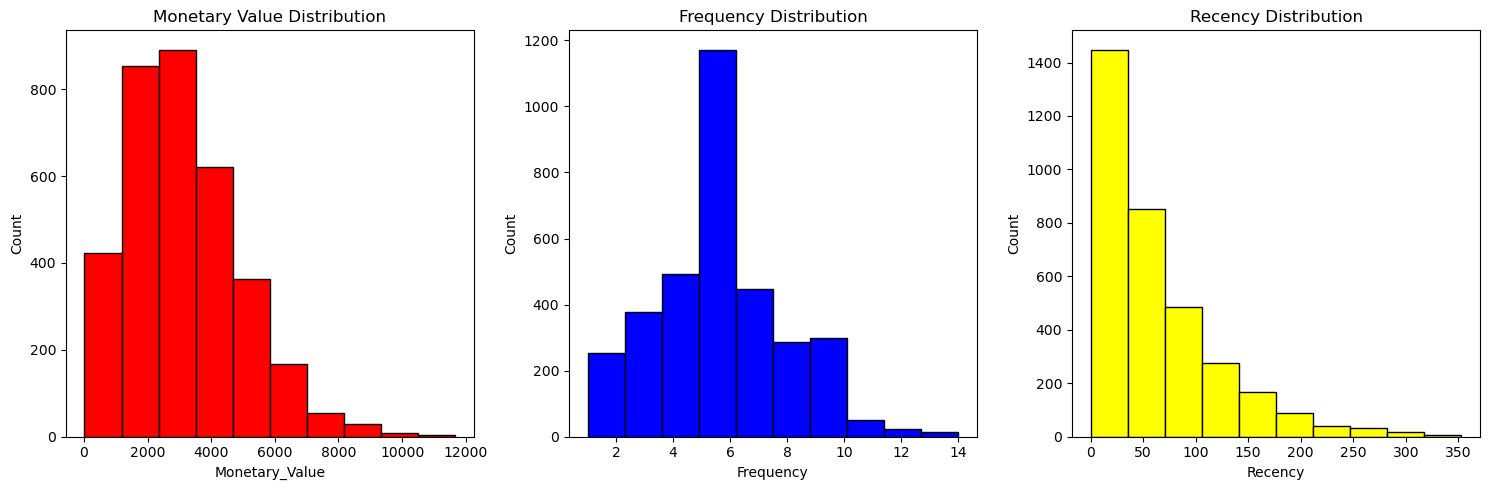

In [245]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(agg_customer["Monetary_value"],bins=10,color="red", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary_Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(agg_customer["Frequency"],bins=10,color="blue", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(agg_customer["Recency"],bins=10,color="Yellow", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

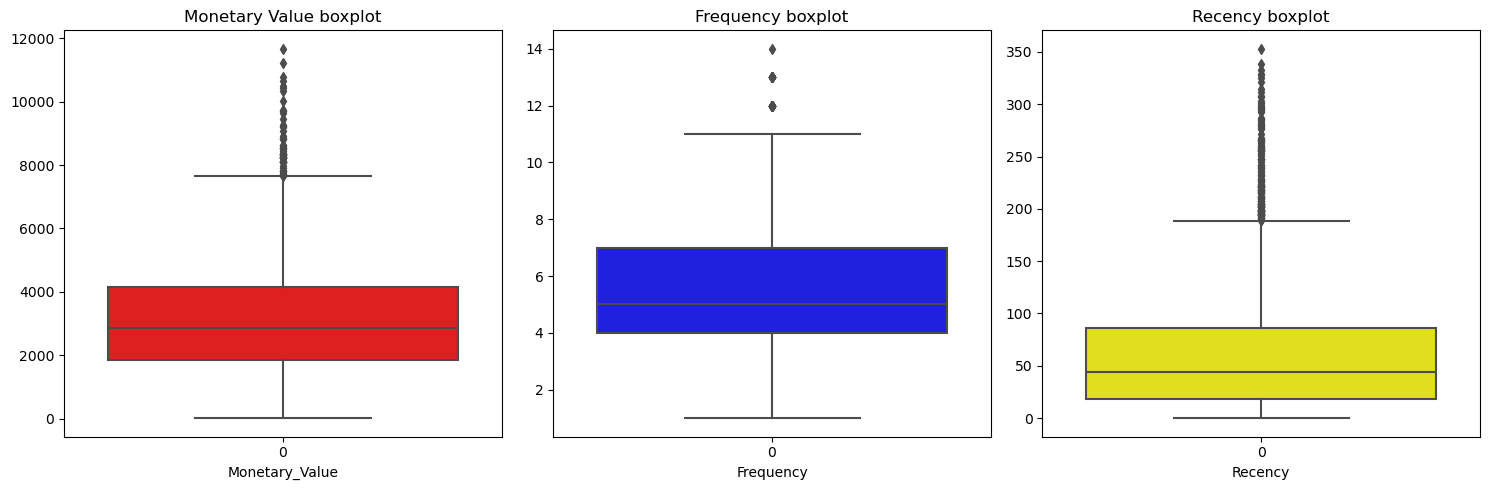

In [247]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=agg_customer["Monetary_value"],color="red")
plt.title("Monetary Value boxplot")
plt.xlabel("Monetary_Value")

plt.subplot(1,3,2)
sns.boxplot(data=agg_customer["Frequency"],color="blue")
plt.title("Frequency boxplot")
plt.xlabel("Frequency")


plt.subplot(1,3,3)
sns.boxplot(data=agg_customer["Recency"],color="Yellow")
plt.title("Recency boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show

In [249]:
agg_customer.describe()

,customer_id,Monetary_value,Frequency,Last_Invoice,Recency
count,3412.000000,3412.000000,3412.000000,3412,3412.000000
mean,1751.154748,3119.383406,5.627784,2017-10-29 08:45:26.377491200,61.635111
min,1.000000,15.080000,1.000000,2017-01-11 00:00:00,0.000000
25%,877.750000,1833.895000,4.000000,2017-10-05 00:00:00,18.000000
50%,1750.500000,2847.585000,5.000000,2017-11-16 00:00:00,44.000000
75%,2623.250000,4165.615000,7.000000,2017-12-12 00:00:00,86.000000
max,3500.000000,11668.950000,14.000000,2017-12-30 00:00:00,353.000000
std,1009.235853,1770.750531,2.285621,NaN,58.548190


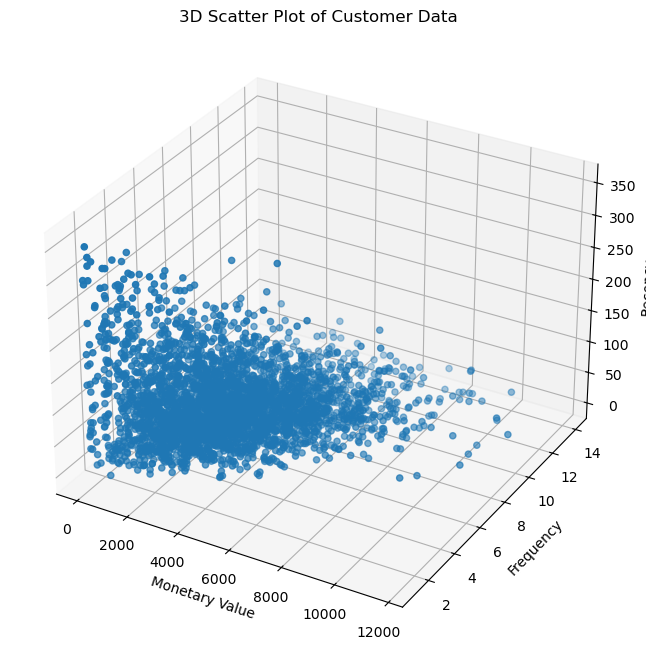

In [251]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(agg_customer["Monetary_value"], agg_customer["Frequency"], agg_customer["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## The scatter plot is overly concentrated in the monetary value so it would be hard to find the random centriods, standard scaling would solve that by transforming the data so it has the mean of zero and standard deviation of 1 

In [254]:
scaler= StandardScaler()
scaled_data=scaler.fit_transform(agg_customer[["Monetary_value", "Frequency", "Recency"]])
                                 

In [256]:
scaled_data

array([[-0.05721204,  2.35078442, -0.9333016 ],
       [-0.50444955, -1.14987087,  1.13367494],
       [-1.63729348, -1.58745279,  2.27819914],
       ...,
       [ 0.01578466,  0.16287486,  1.11659249],
       [ 1.03692511,  0.60045677, -0.18167377],
       [-0.75319411,  0.16287486,  1.40699415]])

In [258]:
scaled_data_df= pd.DataFrame(scaled_data,index=agg_customer.index,columns= ("Monetary_value", "Frequency", "Recency"))
                             

In [260]:
scaled_data_df

,Monetary_value,Frequency,Recency
0,-0.057212,2.350784,-0.933302
1,-0.504450,-1.149871,1.133675
2,-1.637293,-1.587453,2.278199
3,-0.409177,0.162875,-0.779560
4,0.467196,-0.274707,0.040398
...,...,...,...
3407,-0.606353,-0.712289,3.320229
3408,-0.830879,-1.149871,-0.164591
3409,0.015785,0.162875,1.116592
3410,1.036925,0.600457,-0.181674


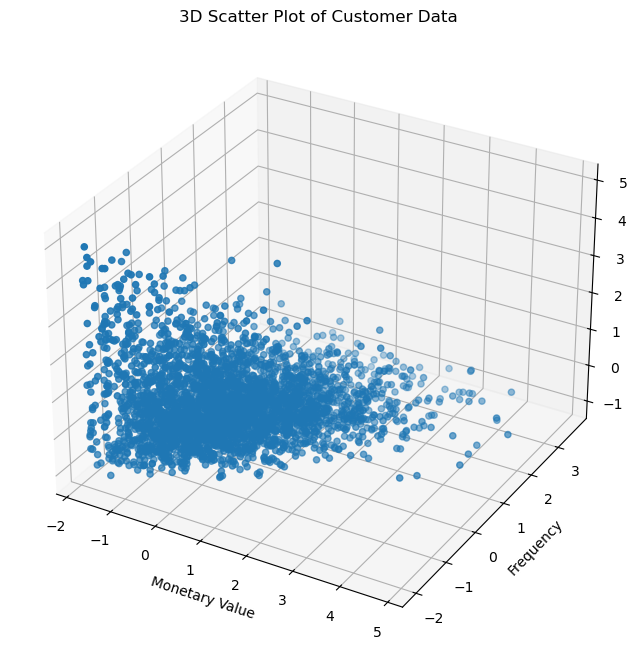

In [262]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["Monetary_value"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## Kmeans Clustering 

C:\Users\agbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\agbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\agbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\agbar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\agbar\anaconda3\Lib\site-packages\sklearn\clust

<function matplotlib.pyplot.show(close=None, block=None)>

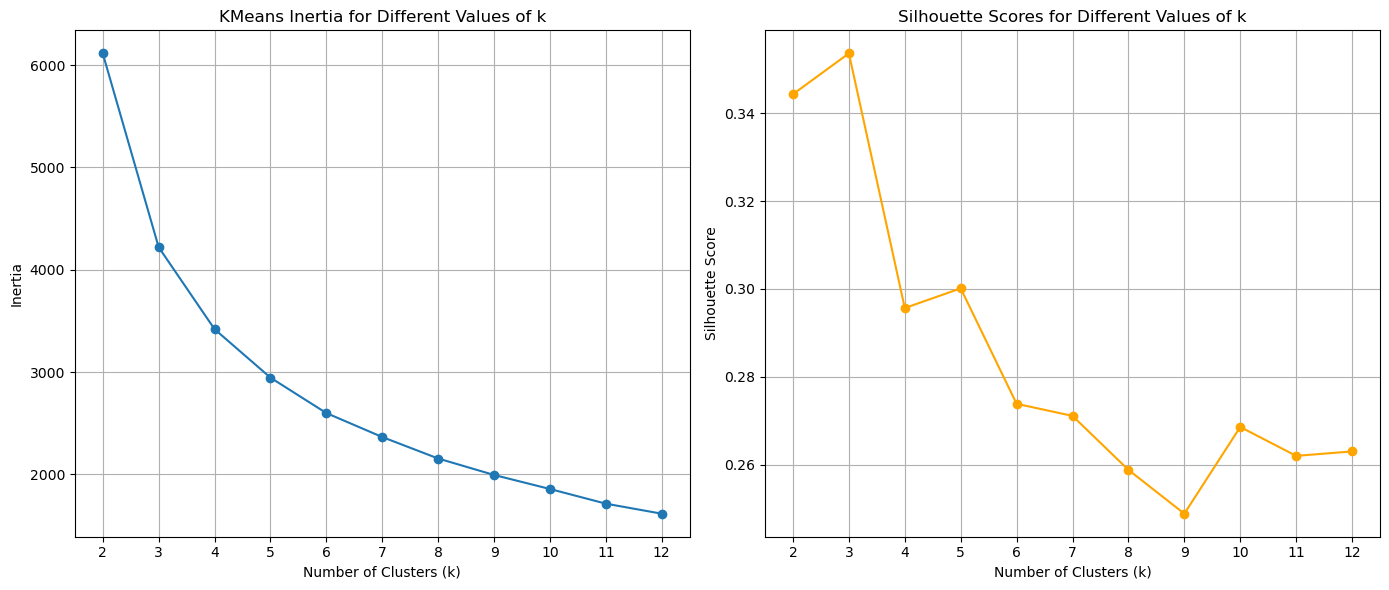

In [265]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show

In [266]:
import warnings
warnings.filterwarnings("ignore")

## After using the Elbow method and silhouette method to check for the most optimal number of cluster for the data set, the elbow method shoes k-4 or k-5 but the silhouette method gives us a clearer picture 

In [268]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

print(cluster_labels)

[0 1 1 ... 3 3 1]


In [269]:
agg_customer["Cluster"] = cluster_labels

agg_customer

,customer_id,Monetary_value,Frequency,Last_Invoice,Recency,Cluster
0,1,3018.09,11,2017-12-23,7,0
1,2,2226.26,3,2017-08-24,128,1
2,4,220.57,2,2017-06-18,195,1
3,5,2394.94,6,2017-12-14,16,3
4,6,3946.55,5,2017-10-27,64,3
...,...,...,...,...,...,...
3407,3496,2045.84,4,2017-04-18,256,1
3408,3497,1648.32,3,2017-11-08,52,2
3409,3498,3147.33,6,2017-08-25,127,3
3410,3499,4955.25,7,2017-11-09,51,3


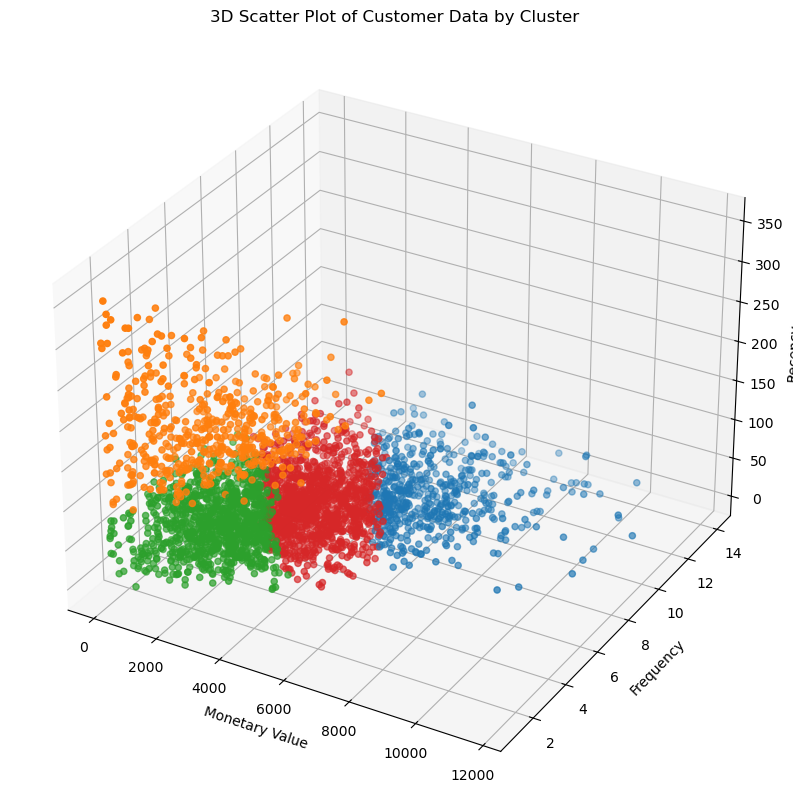

In [270]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = agg_customer['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(agg_customer['Monetary_value'], 
                     agg_customer['Frequency'], 
                     agg_customer['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [278]:
## Descriptive explanation for the clusters using violin plot 

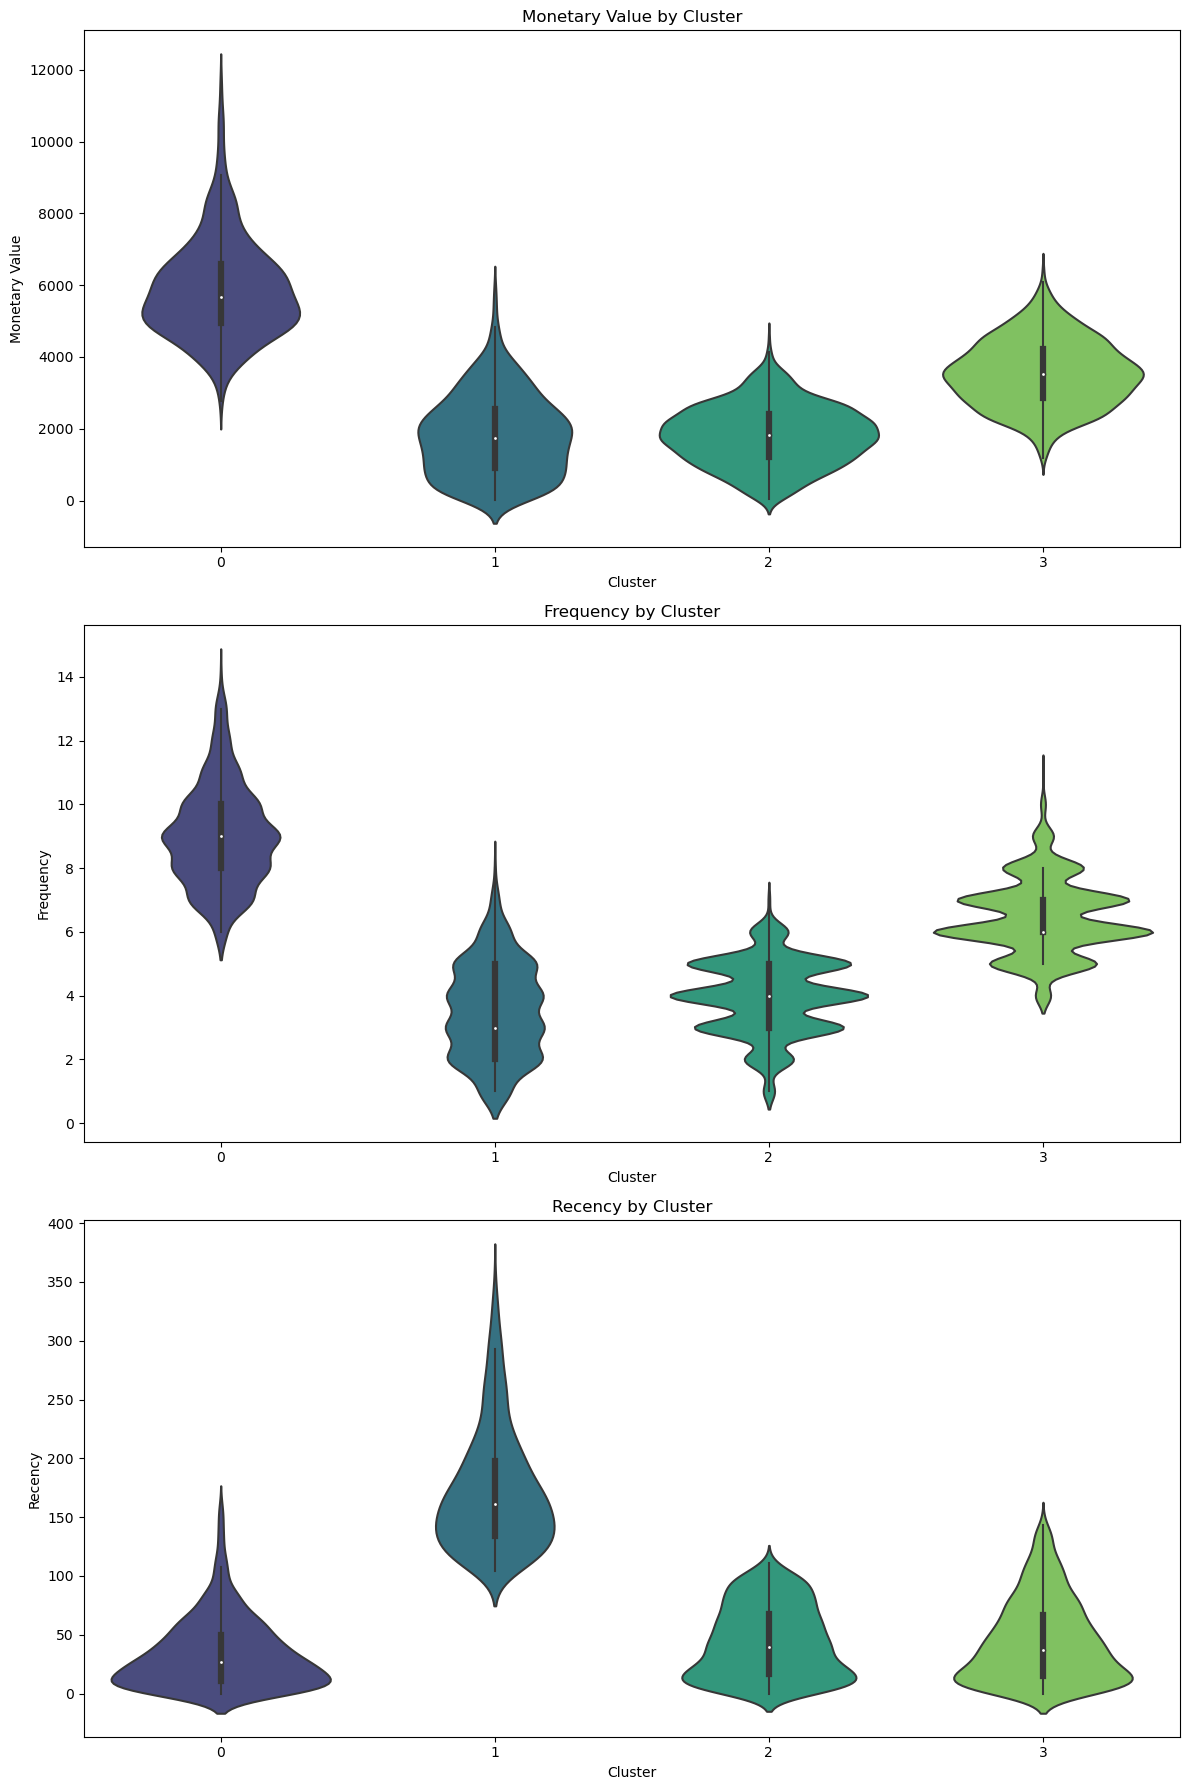

In [271]:

# Set up figure size
plt.figure(figsize=(12, 18))

# Define the color palette for clusters if not done yet
cluster_colors = sns.color_palette("viridis", n_colors=len(agg_customer['Cluster'].unique()))

# Plot Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x='Cluster', y='Monetary_value', data=agg_customer, palette=cluster_colors)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Plot Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x='Cluster', y='Frequency', data=agg_customer, palette=cluster_colors)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Plot Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x='Cluster', y='Recency', data=agg_customer, palette=cluster_colors)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

# Adjust layout
plt.tight_layout()
plt.show()


 ## Cluster 0: This cluster represents high-value customers who spend more, purchase more frequently, and make recent purchases. These customers are likely to be loyal to the brand and contribute significantly to revenue.
 
## Cluster 1: This cluster represents customers who spend less, purchase less frequently, and have longer gaps between purchases. They might be less engaged or have lower brand loyalty.

## Cluster 2: This cluster represents customers with low spending and frequency, They might be occasional shoppers or those who have recently started engaging with the brand.

## Cluster 3: This cluster represents customers with moderate spending and frequency but have high percentage of customers purchasing recently 


In [281]:
Cluster_Labels={
        0:"Premium",
        1:"Casual",
        2:"Dormant",
        3:"Active" 
}

In [283]:
agg_customer["ClusterLabel"] = agg_customer["Cluster"].map(Cluster_Labels)

agg_customer

,customer_id,Monetary_value,Frequency,Last_Invoice,Recency,Cluster,ClusterLabel
0,1,3018.09,11,2017-12-23,7,0,Premium
1,2,2226.26,3,2017-08-24,128,1,Casual
2,4,220.57,2,2017-06-18,195,1,Casual
3,5,2394.94,6,2017-12-14,16,3,Active
4,6,3946.55,5,2017-10-27,64,3,Active
...,...,...,...,...,...,...,...
3407,3496,2045.84,4,2017-04-18,256,1,Casual
3408,3497,1648.32,3,2017-11-08,52,2,Dormant
3409,3498,3147.33,6,2017-08-25,127,3,Active
3410,3499,4955.25,7,2017-11-09,51,3,Active


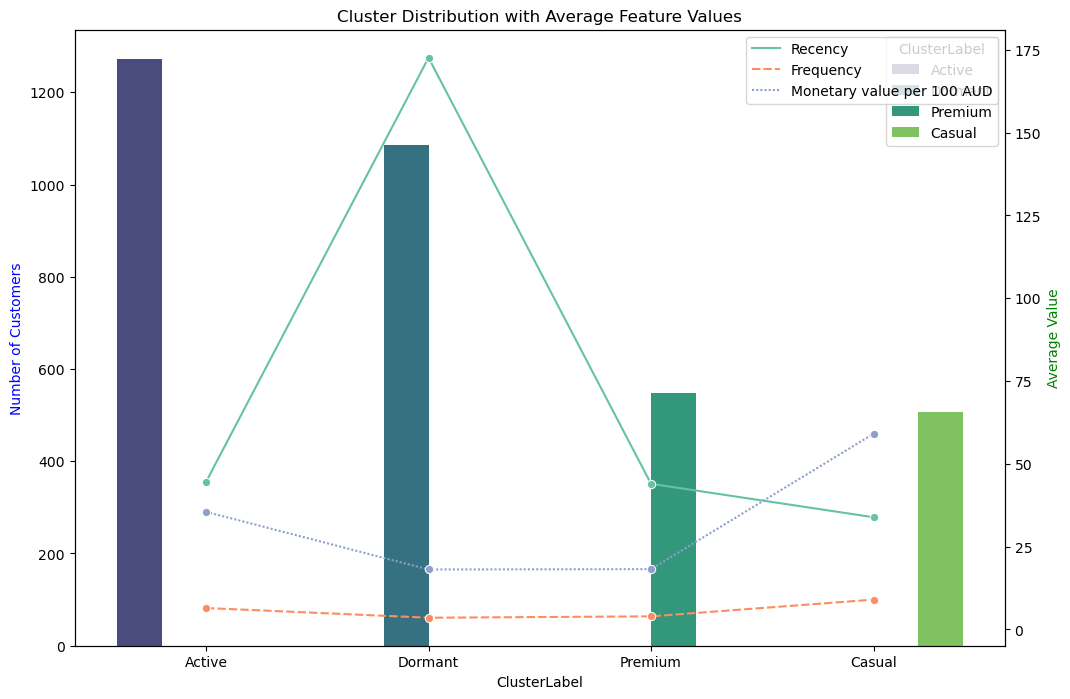

In [285]:
cluster_counts = agg_customer['ClusterLabel'].value_counts()
agg_customer["Monetary value per 100 AUD"] = agg_customer["Monetary_value"] / 100.00
feature_means = agg_customer.groupby('ClusterLabel')[['Recency', 'Frequency', 'Monetary value per 100 AUD']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

In [287]:
agg_customer.to_csv('clusteredcustomer.csv', index=False)